<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualization-of-Results" data-toc-modified-id="Visualization-of-Results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualization of Results</a></span><ul class="toc-item"><li><span><a href="#Reading-the-Results" data-toc-modified-id="Reading-the-Results-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reading the Results</a></span></li><li><span><a href="#Computing-the-variables" data-toc-modified-id="Computing-the-variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Computing the variables</a></span></li><li><span><a href="#Doing-a-plot" data-toc-modified-id="Doing-a-plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Doing a plot</a></span></li><li><span><a href="#Doing-a-video" data-toc-modified-id="Doing-a-video-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Doing a video</a></span></li></ul></li></ul></div>

In [4]:
#%%python3
import sys  
import os
import numpy as np
import matplotlib.pyplot as plt

# IMPORT PATH TO PYTHONTOOLS MODULE"
sys.path.append('../../PythonTools')

import plotResults
import tkinter as tk

from tkinter import filedialog


plt.style.use('classic')
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams['figure.facecolor'] = 'white'



%gui tk


# Visualization of Results

This is a generic notebook to visualize the results

## Reading the Results

In [5]:

root = tk.Tk()
root.withdraw()

currentPath = os.getcwd()
filename = filedialog.askopenfilename(parent=root, initialdir=currentPath)
root.destroy()
print('Reading %s' % filename)

results = []
with open(filename, 'r') as data:
    j = 0                   # counter of the lines of the file
    for line in data:
        p = line.split()
        results.append(np.array(p))


# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float_)        

plotData = plotResults.Data(resultsTP)
# Initializing without the results to choose it directly by hand
#plotData2 = plotResults.Data()

print("NbEqs = ", plotData.nbEqs)
print("NbCells = ",plotData.nbCells)




Reading /home/berger/Documents/simu/MUFFIN/testcases/1_Test_Euler/Results_SodTube_FirstOrder_Roe/file_iter_000200_time_1.2965e-01.txt
NbEqs =  3
NbCells =  200


## Computing the variables

In [6]:
def computeEulerVars(resultsArray):

    x       = resultsArray[0]
    rho     = resultsArray[1]
    rhoU    = resultsArray[1]
    rhoE    = resultsArray[2]
    U       = rhoU/rho
    p       = 2./3.*(rhoE - 0.5*rho*U**2)
    T       = p/rho
    return x, rho, rhoU, rhoE, U, p, T

x, rho, rhoU, rhoE, U, p, T = computeEulerVars(plotData.resultsArray)



## Doing a plot

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font famil

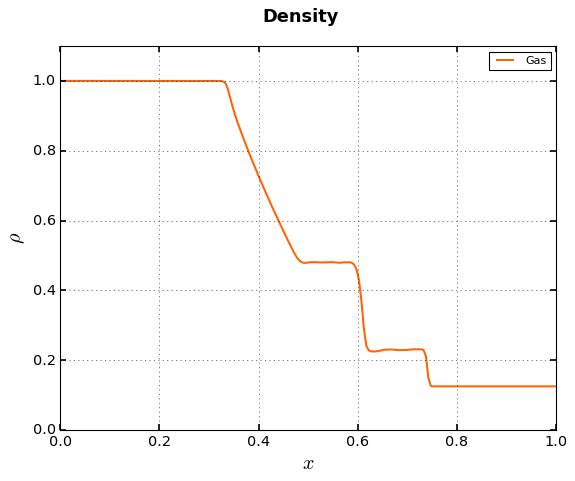

In [7]:
%matplotlib inline

f, ax = plt.subplots(1)

ax.plot(x, rho, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Gas')
ax.set_xlabel(r'$x$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$\rho$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'best', fontsize = 10)

f.suptitle('Density', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ax.grid(True)
ax.set_ylim((0, 1.1))


plt.show()

## Doing a video

In [8]:
# from matplotlib import animation, rc
# import sys
# import glob

# def animateVariable(Var_ID = 1, fig = None, ax=None, Directory=None):
    
#     if Directory == None:
#         root = tk.Tk()
#         root.withdraw()
#         # Choose the directory
#         currentPath = os.getcwd()
#         Directory = filedialog.askdirectory(parent=root, initialdir=currentPath)
#         root.destroy()

#     # open all the files in the directory and sort them to do the video in order
#     files       = glob.glob(Directory + "/*.txt")
#     filesSorted = sorted(files, key = lambda x: os.path.getmtime(x), reverse=True)
#     files.sort(key=os.path.getmtime)

#     if fig == None:
#         fig, ax = plt.subplots()

#         ax.set_xlim((0, 1))
#         ax.set_ylim((0, 1.2))
#         ax.grid(True)
#     line, = ax.plot([], [], lw=2, color='k')

#     def animate_func(i):
#         file_name = files[i]
#         # Take the time
#         base = base=os.path.basename(file_name)
#         filenameBase = os.path.splitext(base)[0]
#         time = filenameBase.rsplit('_', 1)[1]
        
#         results = []
#         with open(file_name, 'r') as data:
#             j = 0                   # counter of the lines of the file
#             for line in data:
#                 p = line.split()
#                 results.append(np.array(p))
#         # Transpose and change data type
#         results   = np.array(results)
#         resultsTP = np.transpose(results)
#         resultsTP = resultsTP.astype(np.float)        
#         plotData  = plotResults.Data(resultsTP)
        
#         PlotData = computeEulerVars(plotData.resultsArray)

#         x       = PlotData[0, :]
#         y       = PlotData[varID, :]
        
#         line.set_data(x, y)
#         return line,

#     anim = animation.FuncAnimation(
#                                     fig,
#                                     animate_func,
#                                     frames = int(np.shape(files)[0])
#                                     )
#     plt.close()

#     return anim


In [9]:
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((0., 1.1))
ax.grid(True)

plt.close()

anim = plotResults.animationResults(fig=fig, ax=ax, varID=3, Directory="./Results_SodTube_FirstOrder_Roe")




# anim = plotResults.animationResults(fig=fig, ax=ax, varID=5)

HTML(anim.to_jshtml())

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

In [10]:
from IPython.display import HTML
HTML(anim.to_jshtml)

TypeError: 'method' object is not subscriptable